In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model


In [180]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv',index_col=0)
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [181]:
#1. Get the numerical variables from our dataset.


In [182]:
data_num = data._get_numeric_data()
data_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


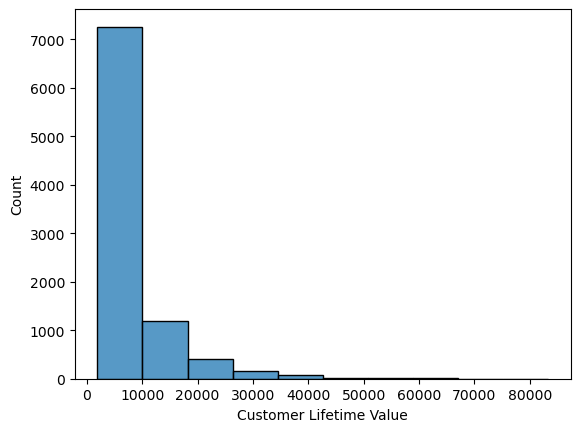

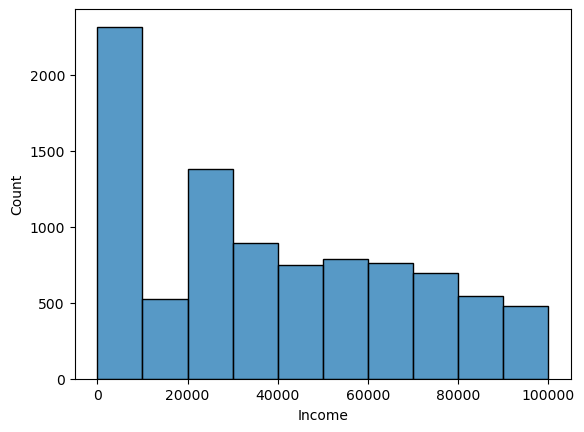

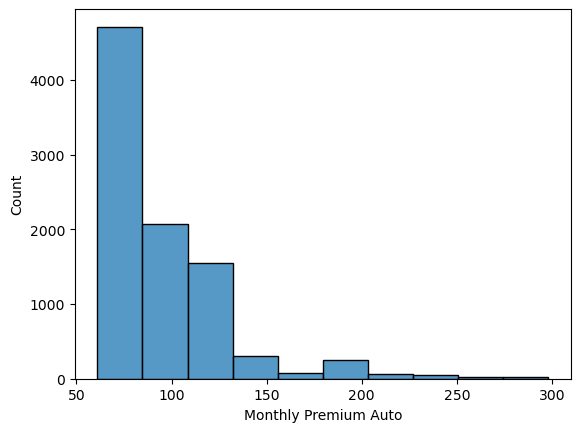

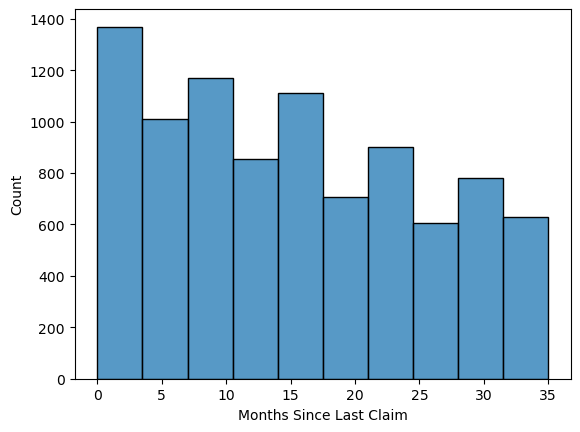

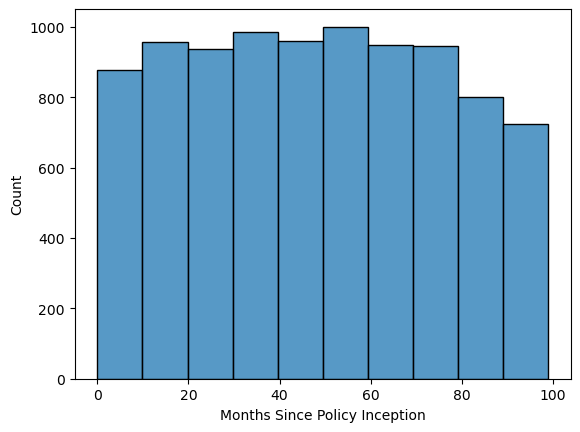

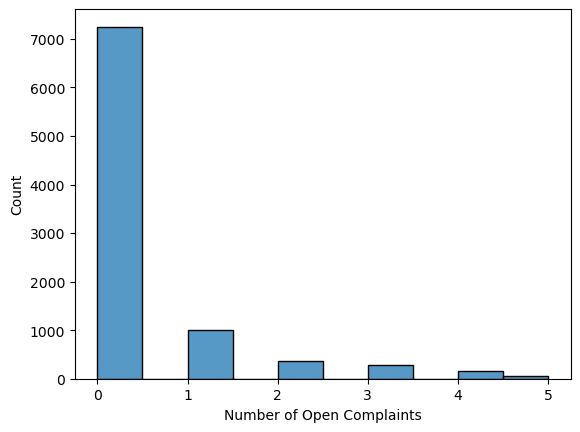

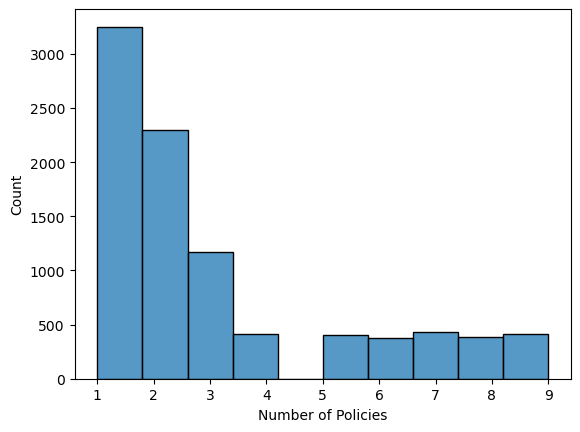

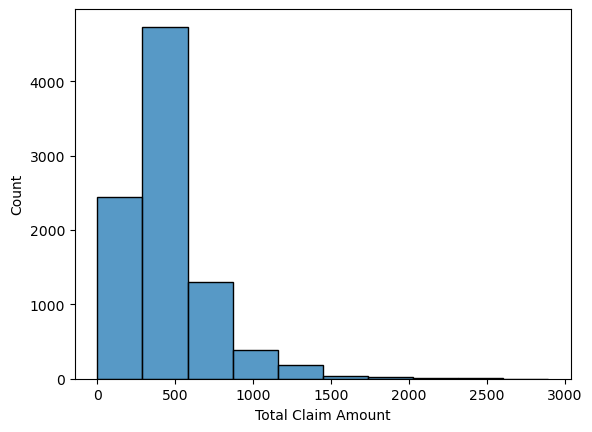

In [183]:
#2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
for column in data_num.columns:
    sns.histplot(data_num[column], bins=10)
    plt.show()


In [184]:
#3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [193]:
def apply_iqr(data_num): 
    for col in data_num.columns:
        iqr = np.percentile(data_num[col],75) - np.percentile(data_num[col],25) 
        upper_limit = np.percentile(data_num[col],75) + 1.5*iqr  
        lower_limit = np.percentile(data_num[col],25) - 1.5*iqr
        num_no_out =data_num[data_num[col]< upper_limit]
    return num_no_out

In [194]:
data_num2 = apply_iqr(data_num)

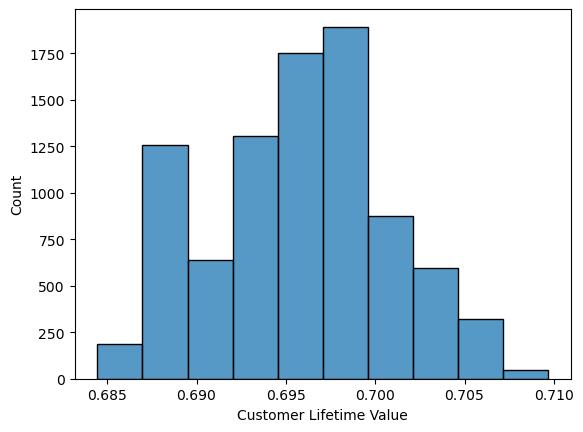

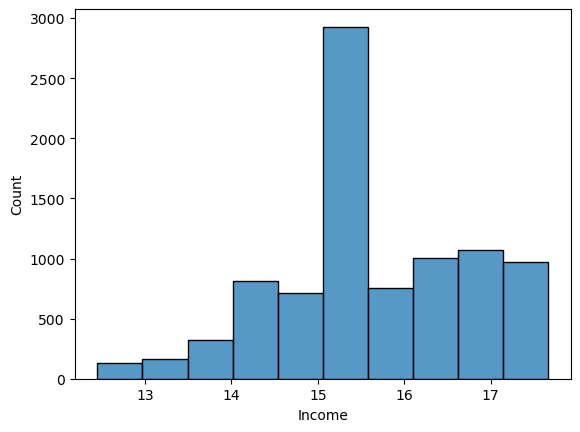

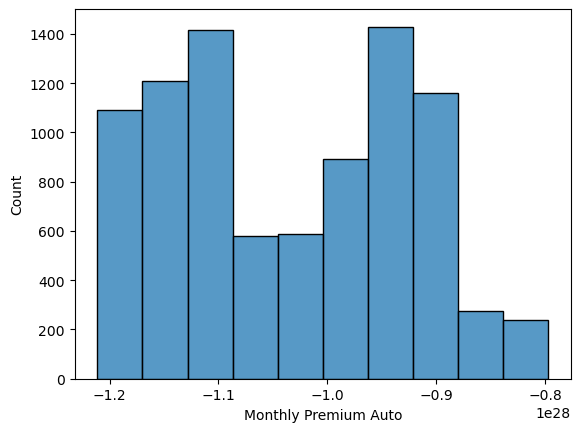

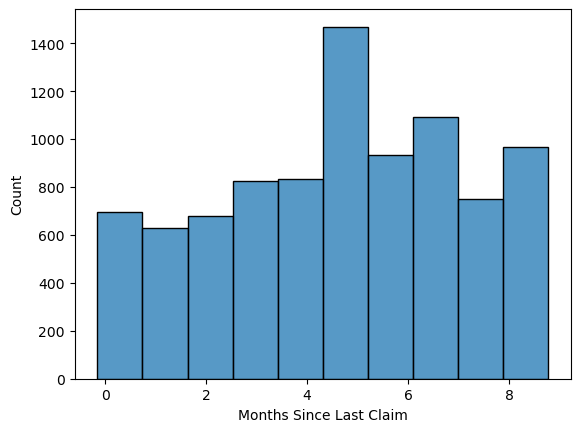

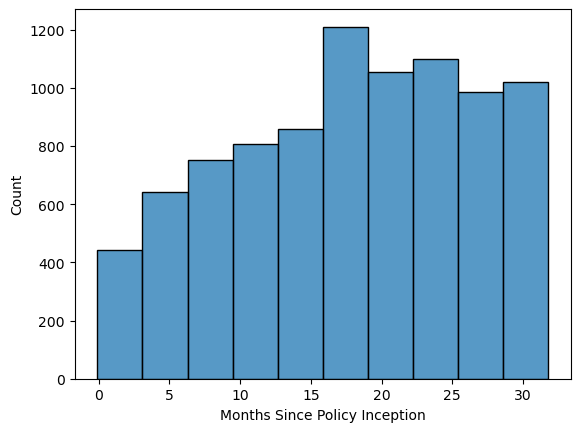

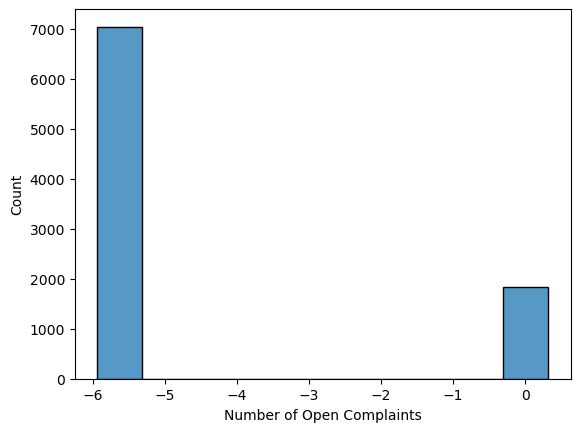

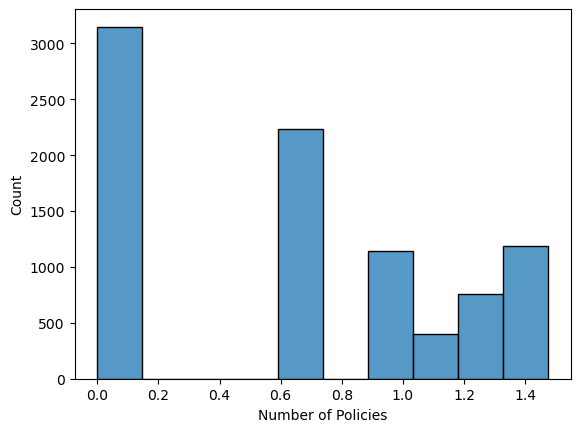

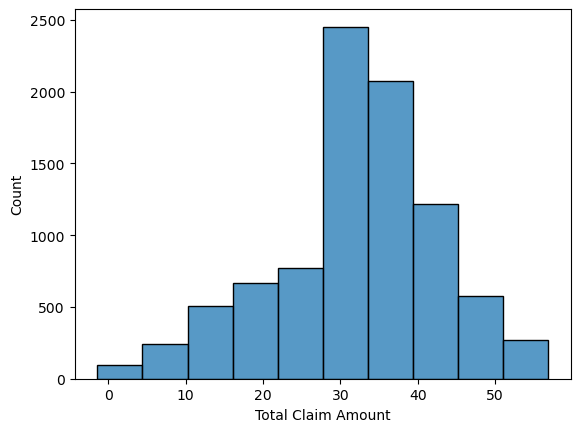

In [195]:
for column in data_num2.columns:
    sns.histplot(data_num2[column], bins=10)
    plt.show()

In [188]:
from scipy import stats 

In [191]:
def replace_negatives(data_num): 
    for col in data_num.columns:
        if len(data_num[data_num[col] <= 0]) >1:
            data_num[col] = np.where(data_num[col] <0, 0, data_num[col])
            data_num[col] =data_num[col].replace(0,data_num[col].mean()) 
    
    for col in data_num.columns:
        arr, lmbda = stats.boxcox(data_num[col]) 
        data_num[col] = arr
    return data_num

In [192]:
replace_negatives(data_num)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer,,,,,,,,
BU79786,0.688843,16.267154,-1.122127e+28,8.263287,1.973469,-5.941376,0.000000,33.035752
QZ44356,0.697309,15.087427,-9.745620e+27,4.242906,16.560324,-5.941376,1.424359,56.357614
AI49188,0.701486,15.929087,-9.313425e+27,5.494473,15.299567,-5.941376,0.607328,40.071789
WW63253,0.697993,15.087427,-9.365593e+27,5.494473,23.200494,-5.941376,1.363462,38.763252
HB64268,0.689038,15.679961,-1.088256e+28,3.964412,17.176536,-5.941376,0.000000,19.560154
...,...,...,...,...,...,...,...,...
LA72316,0.704734,16.856430,-1.088256e+28,5.494473,29.375878,-5.941376,0.607328,23.588905
PK87824,0.690052,14.080421,-1.046702e+28,4.510638,11.947536,-5.941376,0.000000,32.792951
TD14365,0.698470,15.087427,-1.013445e+28,3.048398,14.978006,0.311563,0.607328,47.263726


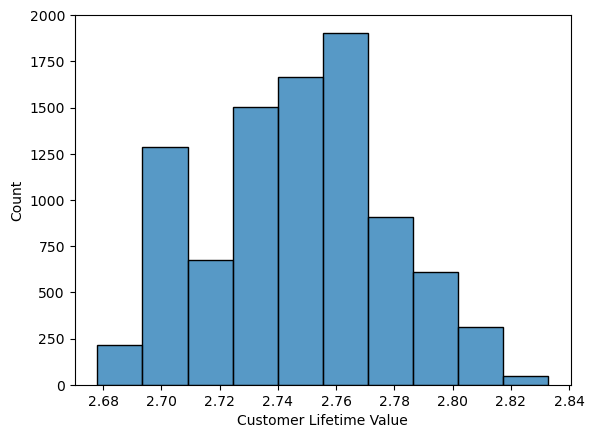

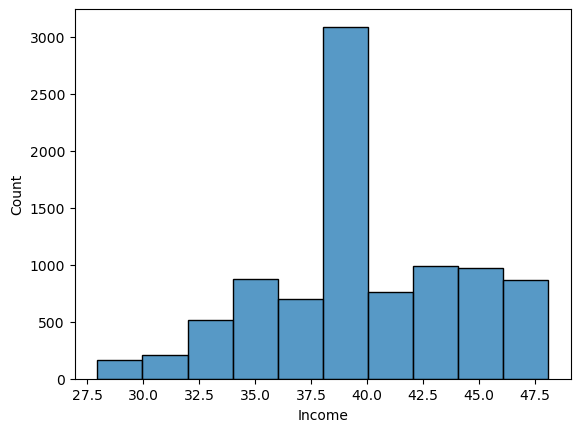

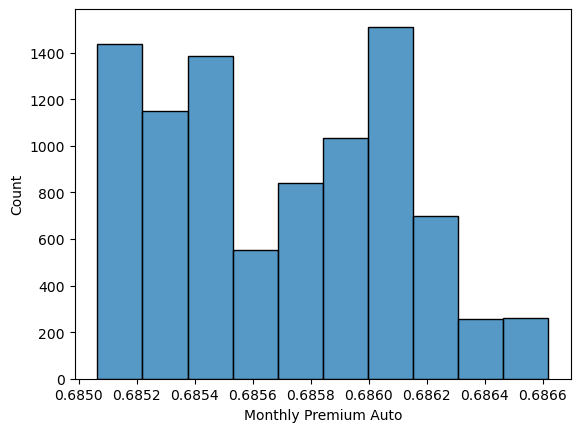

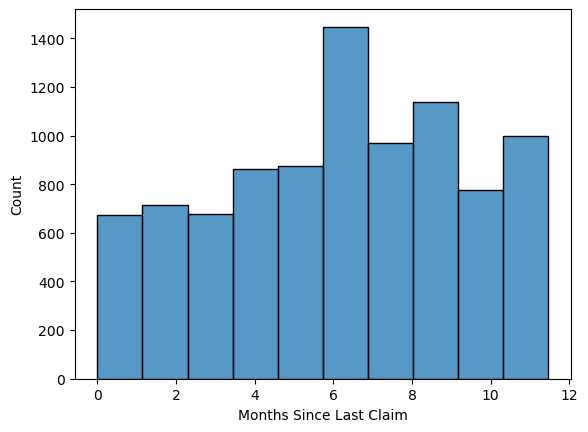

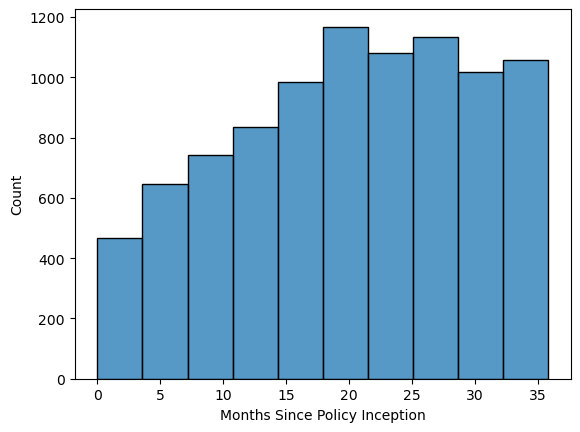

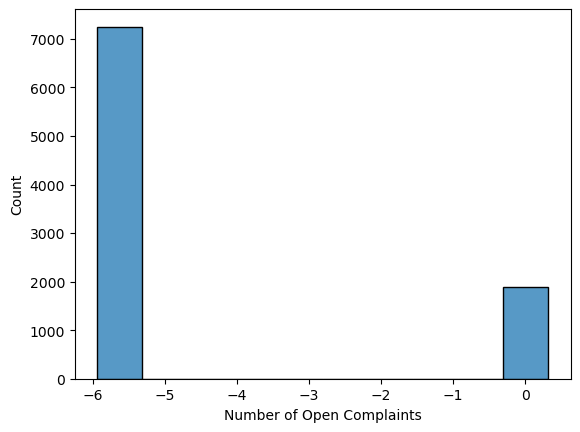

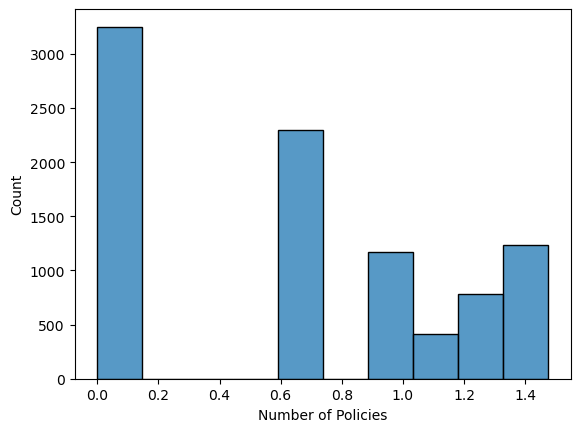

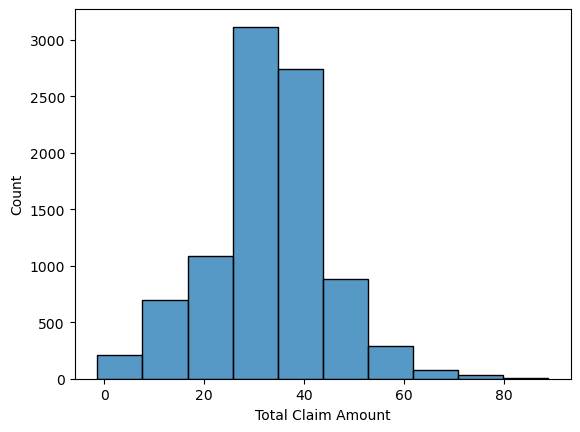

In [156]:
for column in data_num.columns:
    sns.histplot(data_num[column], bins=10)
    plt.show()

In [ ]:
# in the majority of the cases boxcox was a good solution for a normal distribution, 
#for "monthly premium auto", "number of open complaints" and "number of policies" it doens't had such an effect

In [ ]:
def apply_log(data_num): 
    for col in data_num.columns:
        data_num[col]=np.log(data_num[col])
    return num_no_out


